In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape of training data {}".format(X_train.shape))
print(y_train)
print("Shape of testing data {}".format(X_test.shape))

Shape of training data (60000, 28, 28)
[5 0 4 ... 5 6 8]
Shape of testing data (10000, 28, 28)


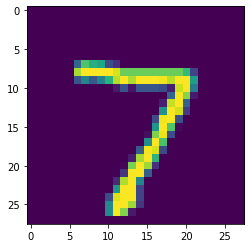

In [3]:
plt.imshow(X_test[0])

In [4]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1]*X_train.shape[2]       # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


#### Building a neural network

In [7]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Train and Test the Network

In [8]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=2)

W1021 23:47:47.561471 139790659536640 deprecation_wrapper.py:119] From /home/mirajul/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1021 23:47:47.586300 139790659536640 deprecation_wrapper.py:119] From /home/mirajul/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1021 23:47:47.589859 139790659536640 deprecation_wrapper.py:119] From /home/mirajul/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1021 23:47:47.645090 139790659536640 deprecation_wrapper.py:119] From /home/mirajul/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer i

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 30s - loss: 0.1870 - acc: 0.9428 - val_loss: 0.1121 - val_acc: 0.9653
Epoch 2/10
 - 28s - loss: 0.0778 - acc: 0.9755 - val_loss: 0.0899 - val_acc: 0.9734
Epoch 3/10
 - 28s - loss: 0.0546 - acc: 0.9822 - val_loss: 0.0761 - val_acc: 0.9780
Epoch 4/10
 - 28s - loss: 0.0394 - acc: 0.9875 - val_loss: 0.0698 - val_acc: 0.9800
Epoch 5/10
 - 28s - loss: 0.0324 - acc: 0.9894 - val_loss: 0.0690 - val_acc: 0.9810
Epoch 6/10
 - 28s - loss: 0.0262 - acc: 0.9913 - val_loss: 0.0832 - val_acc: 0.9806
Epoch 7/10
 - 28s - loss: 0.0219 - acc: 0.9925 - val_loss: 0.0762 - val_acc: 0.9824
Epoch 8/10
 - 30s - loss: 0.0183 - acc: 0.9938 - val_loss: 0.0960 - val_acc: 0.9778
Epoch 9/10
 - 32s - loss: 0.0177 - acc: 0.9944 - val_loss: 0.1081 - val_acc: 0.9796
Epoch 10/10
 - 34s - loss: 0.0169 - acc: 0.9949 - val_loss: 0.0835 - val_acc: 0.9820


In [9]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))  
print(model.metrics_names)

Accuracy: 0.982% 
 Error: 0.018000000000000016
['loss', 'acc']


In [25]:
pred=model.predict(X_test)
print(pred)
maxInRows = np.argmax(pred, axis=1)      #axis=1 for rows, axis=0 for columns
#index_max = np.argmax(pred)
print(maxInRows)

[[2.0474861e-17 7.4564938e-10 8.8379485e-14 ... 1.0000000e+00
  1.2856098e-13 8.4026963e-09]
 [2.5703523e-21 2.4156274e-13 1.0000000e+00 ... 1.2857059e-16
  2.1908650e-18 3.7526232e-25]
 [3.9836401e-13 9.9999857e-01 4.5891344e-08 ... 7.6138029e-08
  5.4214077e-08 6.7501781e-12]
 ...
 [3.0366611e-17 8.4912945e-12 3.9672532e-16 ... 2.6855245e-09
  8.3709786e-08 2.4975566e-09]
 [1.2246237e-21 3.6482986e-17 8.3975144e-18 ... 2.1517481e-16
  2.4972485e-08 6.7444531e-18]
 [1.2445641e-13 3.8134499e-17 1.6060302e-13 ... 5.0608567e-16
  1.3273887e-13 8.6404611e-15]]
[7 2 1 ... 4 5 6]


In [10]:
#Saving the model

model.save('classification_model.h5')

In [11]:
#Loading model for further use

from keras.models import load_model
pretrained_model = load_model('classification_model.h5')